In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
city_data_to_load='/Users/humbertorodriguez/Documents/Bootcamp_Data_Analyst/Module_5/Async/PyBer_Analysis/Resources/city_data.csv'
ride_data_to_load='/Users/humbertorodriguez/Documents/Bootcamp_Data_Analyst/Module_5/Async/PyBer_Analysis/Resources/ride_data.csv'

## Inspect the City Data DataFrame

In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#unique values type column
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_data_df['type']=='Urban')

66

In [8]:
sum(city_data_df['type']=='Rural')

18

In [9]:
(city_data_df['type']=='Suburban').sum()

36

## Inspect the Ride DataFrame

In [10]:
# Get the columns and the rows that are null.

ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df=pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Create DataFrames for Each Type of City

In [14]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']

In [15]:
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']

In [16]:
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

## Get the Number of Rides for Each City Type

In [17]:
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']

In [18]:
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']

In [19]:
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']

## Get the Average Fare for Each City Type

In [20]:
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']

In [21]:
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']

In [22]:
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']

## Get the Average Number of Drivers for Each City Type

In [23]:
urban_driver_count=urban_cities_df.groupby(['city']).mean()['driver_count']

In [24]:
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']

In [25]:
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

## Create Bubble Charts

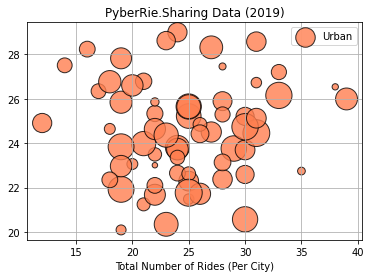

In [26]:
#Urban

urban_ride_count
urban_avg_fare

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            label='Urban', c='coral', edgecolor='black', linewidths=1, alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

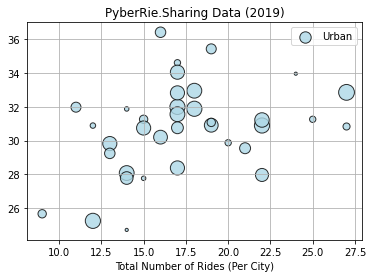

In [27]:
#Suburban

suburban_ride_count
suburban_avg_fare

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label='Urban', c='lightblue',edgecolor='black', linewidths=1, alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

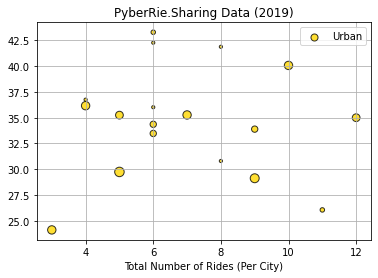

In [28]:
#Rural

rural_ride_count
rural_avg_fare
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            label='Urban', c='gold', edgecolor='black',linewidths=1 , alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

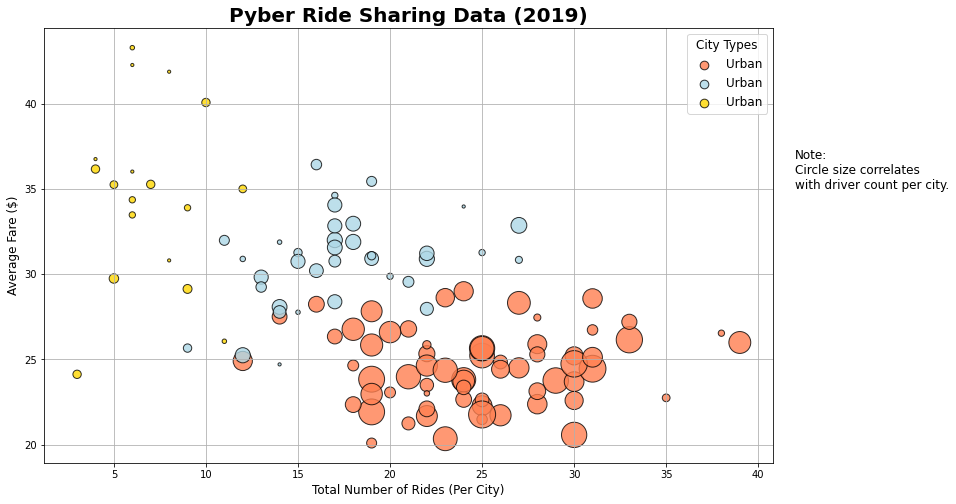

In [33]:
plt.figure(figsize=(15,8))

#Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            label='Urban', c='coral', edgecolor='black', linewidths=1, alpha=.8)

#Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label='Urban', c='lightblue',edgecolor='black', linewidths=1, alpha=.8)


#Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            label='Urban', c='gold', edgecolor='black',linewidths=1 , alpha=.8)

#Adding properties

plt.grid(True)
plt.title('Pyber Ride Sharing Data (2019)', fontweight='bold', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

#format legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\n"
                 "Circle size correlates\n" 
                 "with driver count per city.", fontsize="12",)


plt.subplots_adjust(right=0.8)

plt.savefig("analysis/Fig1.png", dpi=500)

plt.show()

# Save the figure.
